In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import networkx as nx
os.getcwd()

'/Users/loucap/Documents/GitWork/SNA'

# Read-in counts df

In [2]:
df = pd.read_csv('Data/counts.csv')

In [3]:
df

,name,matches,count
0,Cartman,Kyle,1011
1,Cartman,Butters,567
2,Kyle,Cartman,564
3,Stan,Dude,495
4,Cartman,Kenny,401
...,...,...,...
10132,Memberberry 4,Mickey,1
10133,Memberberry 3,Death,1
10134,Memberberry 2,Tubbs,1
10135,Memberberry 1,Member,1


In [4]:
df['count'].value_counts(normalize = True).mul(100).round(1)

count
1      63.9
2      15.3
3       6.6
4       3.7
5       2.3
       ... 
129     0.0
132     0.0
141     0.0
146     0.0
66      0.0
Name: proportion, Length: 107, dtype: float64

In [5]:
G = nx.from_pandas_edgelist(df, source = "name", target = "matches", edge_attr = "count",
                            create_using = nx.DiGraph())

<Axes: >

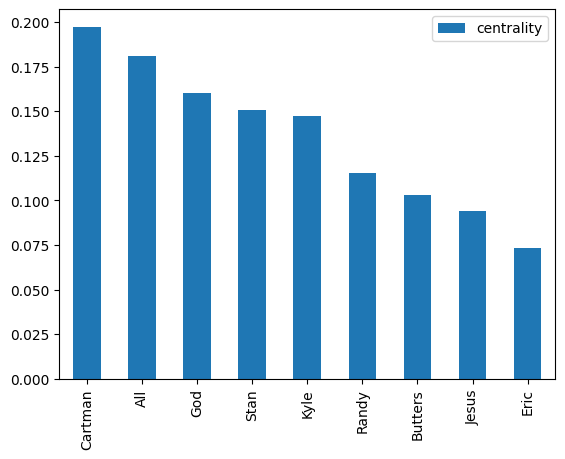

In [6]:
degree_dict = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict(degree_dict, orient = 'index', columns = ['centrality'])
degree_df.sort_values('centrality', ascending = False)[0:9].plot(kind = "bar")

# First visualisation 

With node size varying by degree centrality. 

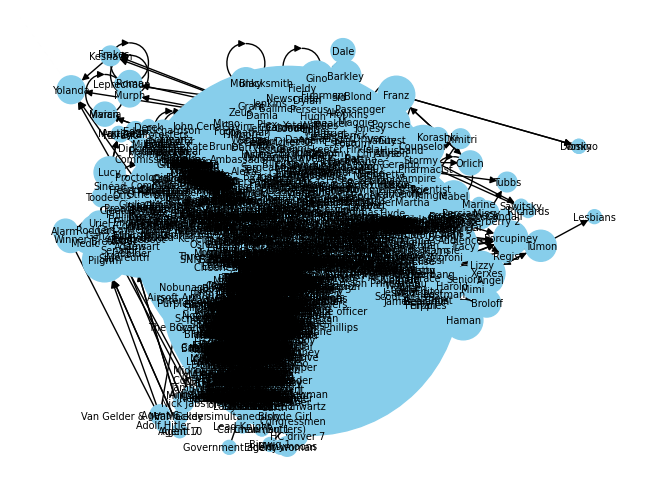

In [7]:
pos = nx.kamada_kawai_layout(G)
node_degree = dict(G.degree()) 
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_cmap = plt.cm.Blues,node_size=[v * 100 for v in node_degree.values()], pos = pos, font_size = 7)

# Second visualisation post edge filter

Given that nearly 80% of my dataset comprises edges with counts of 1 or 2, I am going to filter to remove these low-frequency edges, then will plot again.

In [32]:
filtered = df[df['count'] > 10]

In [33]:
filtered

,name,matches,count
0,Cartman,Kyle,1011
1,Cartman,Butters,567
2,Kyle,Cartman,564
3,Stan,Dude,495
4,Cartman,Kenny,401
...,...,...,...
373,Kyle,Man,11
374,Steve,Customer,11
375,Terrance,Celine,11
376,Chris,Linda,11


In [34]:
G = nx.from_pandas_edgelist(filtered, source = "name", target = "matches", edge_attr = "count",
                            create_using = nx.DiGraph())

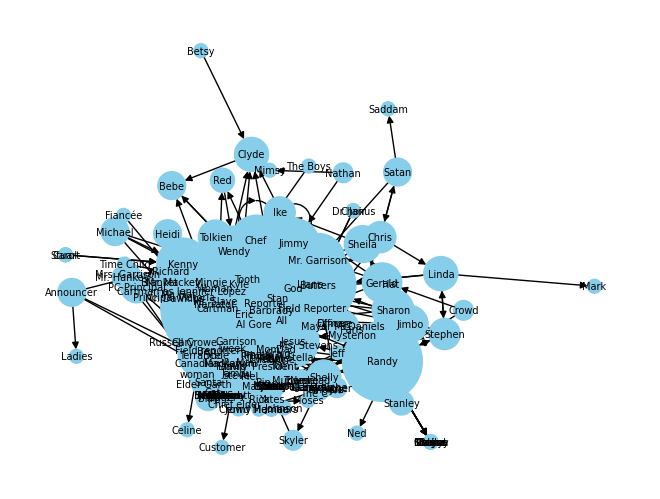

In [35]:
pos = nx.kamada_kawai_layout(G)
node_degree = dict(G.degree()) 
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_cmap = plt.cm.Blues,node_size=[v * 100 for v in node_degree.values()], pos = pos, font_size = 7)

In [36]:
from pyvis.network import Network

In [43]:
net = Network(notebook = True, width = "1000px", height = "700px", bgcolor = '#222222', font_color='white', directed = True)
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)

# for edge in net.edges:
#     edge["arrows"] = "to"

# for edge in net.edges:
#     u = edge["from"]  # Source node
#     v = edge["to"]    # Target node
#     # Access the 'count' attribute from the NetworkX graph
#     if "count" in G.edges[u, v]:  # Ensure 'count' exists
#         edge["width"] = G.edges[u, v]["count"] / 100  # Scale edge width

net.show("southpark.html")

southpark.html


In [14]:
G.number_of_edges()

378

In [17]:
len(G.nodes())

167

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

seed = 13648  # Seed random number generators for reproducibility
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)

edge_colors

range(2, 32)

In [22]:
M

30

In [ ]:
import community as community_louvain
undirected_G = G.to_undirected()

In [ ]:
communities = community_louvain.best_partition(undirected_G)

In [ ]:
communities

In [ ]:
nx.set_node_attributes(undirected_G, communities, 'group')

In [ ]:
com_net = Network(notebook = True, width = '1000px', height = '700px', bgcolor = '#222222', font_color='white')
com_net.from_nx(undirected_G)
com_net.show("south_p_coms.html")